# Atividade de programação

Pesquise uma biblioteca em Python que implemente o algoritmo AES-256 e realize testes de tempo de resposta. Crie 1 caso de teste, registre os resultados em uma tabela e elabore uma descrição textual do método utilizado e dos resultados obtidos. Cada teste deverá ser realizado 100 vezes, e uma análise estatística simples deve ser realizada (calcular desvio padrão e apresentar um histograma).

## Informações

*   Giovanna Furlan Torres - Sistemas de Informação





Para a execução do exercício escoulheu-se a biblioteca cryptography. A qual é recomendada para criptográfica geral e suporta AES-256.

In [39]:
!pip install cryptography # Instalação da biblioteca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Casos de teste

OBS: Para este exercício selecionou-se três casos de teste, sendo dois programados para funcionar corretamente conforme o pedido do exercício e o terceiro para falhar, seguido de uma explicação.

1. Primeiro Teste : O código é responsável por realizar a criptografia de uma frase, utilizando AES-256, logo após, descriptografa-lá utilizando a mesma chave para garantir que a mensagem original seja recuperada.

2. Segundo Teste : O código é responsável por realizar a criptografia com mensagem vazia, com a chave AES-256. 

3. Terceiro Teste : O código é responsável por realizar a criptografia com chave inválida e retornar um erro apropriado.

O **método** utilizado para a realização de tais testes é o AES (Advanced Encryption Standard) - 256. Este utilizada uma chave de criptografia de 256 bits para criptografar e descriptografar dados em blocos de 128 bits, é considerado um dos mais seguros disponíveis atualmente.

##Bibliotecas

Importação das bibliotecas utilizadas

In [40]:
from cryptography.fernet import Fernet
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Teste 1

**Primeiro Teste :** O código é responsável por realizar a criptografia de uma frase, utilizando AES-256, logo após, descriptografa-lá utilizando a mesma chave para garantir que a mensagem original seja recuperada.

In [41]:
key = Fernet.generate_key() # Chave aleatória para o AES-256

fernet = Fernet(key) # Objeto Fernet com a chave gerada

fraseOriginal = "Pode parar de nadar agora, Lily. Finalmente chegamos à costa." # Frase para criptografar

fraseBytes = fraseOriginal.encode() # Conversão da frase para bytes

execucoes = 100 # Número de execuções que a criptografia e descriptografia serão realizadas

tempoExecucao = [] # Lista para armazenar o tempo de execução

fraseCriptografadaLista  = [] # Lista para armazenar as frases criptografadas

fraseDescriptografadaLista = [] # Lista para armazenar as frases descriptografadas

for i in range(execucoes):
    
    # Criptografia 

    inicio = time.time() # Registra o tempo de execução (Começo)

    fraseCriptografada = fernet.encrypt(fraseBytes) # Criptografa a mensagem usando a chave AES-256 

    fim = time.time() # Registra o tempo de execução (Final)

    tempoTotalCriptografia = fim - inicio # Calcula o tempo total que levou para criptografar

    # Descriptografia

    inicio = time.time() # Registra o tempo de execução (Começo)

    fraseDescriptografadaBytes = fernet.decrypt(fraseCriptografada)  # Descriptografa a mensagem usando a chave AES-256 

    fim = time.time() # Registra o tempo de execução (Final)

    tempoTotalDescriptografia = fim - inicio # Calcula o tempo total que levou para descriptografar

    fraseDescriptografada = fraseDescriptografadaBytes.decode() # Frase descriptografada Bytes para string
    
    tempoExecucao.extend([tempoTotalCriptografia, tempoTotalDescriptografia])  # Adiciona o Tempo de execução a lista 'tempoExecucao'

    fraseCriptografadaLista.append(fraseCriptografada) # Adiciona a frase criptografada a lista 'fraseCriptografadaLista'

    fraseDescriptografadaLista.append(fraseDescriptografada) # Adiciona a frase Descriptografada a lista 'fraseDescriptografadaLista'

# DataFrame com resultados
resultados = pd.DataFrame({
    "Mensagem Original": [fraseOriginal] * execucoes,
    "Mensagem Criptografada" : fraseCriptografadaLista,
    "Mensagem Descriptografada": fraseDescriptografadaLista,
    "Tempo de Execução Criptografia (s)": tempoExecucao[::2],  # Seleciona o tempo de execução em segundos para a criptografia
    "Tempo de Execução Descriptografia (s)": tempoExecucao[1::2]  # Seleciona o tempo de execução em segundos para a descriptografia
})

In [42]:
# Verificação 1
if all(aux == fraseOriginal for aux in fraseDescriptografadaLista): # A mensagem de criptografia e descriptografia são iguais
    print("Teste Válido : A mensagem descriptografada é igual à mensagem original.") # Exibe a mensagem de sucesso de são iguais
else:
    print("Erro: a mensagem descriptografada não é igual à mensagem original.") # Exibe a mensagem de erro se são diferentes

Teste Válido : A mensagem descriptografada é igual à mensagem original.


In [43]:
# Verificação 2
if len(fraseCriptografadaLista) == len(fraseDescriptografadaLista) == execucoes: # Número de elementos na lista de mensagem é igual a quantidade de tempo de execuções
    print("Teste Válido : O número de elementos em ambas as listas são iguais.") # Exibe a mensagem de sucesso de são iguais
else:
    print("Erro: o número de elementos nas listas não são iguais ao tempo de execuções.") # Exibe a mensagem de erro se são diferentes

Teste Válido : O número de elementos em ambas as listas são iguais.


In [44]:
# Verificação 3
if all(aux > 0 for aux in tempoExecucao): # O tempo de execução da criptografia e descriptografia não pode ser negativo
    print("Teste Válido : Não teve nenhum tempo de execução negativo.") # Exibe a mensagem de sucesso se não tiver tempo negativo
else:
    print("Erro: Encontrou-se tempo de execução negativo.") # Exibe a mensagem de erro se tiver tempo negativo

Teste Válido : Não teve nenhum tempo de execução negativo.


In [45]:
print(resultados) # Exibe os resultados

                                    Mensagem Original  \
0   Pode parar de nadar agora, Lily. Finalmente ch...   
1   Pode parar de nadar agora, Lily. Finalmente ch...   
2   Pode parar de nadar agora, Lily. Finalmente ch...   
3   Pode parar de nadar agora, Lily. Finalmente ch...   
4   Pode parar de nadar agora, Lily. Finalmente ch...   
..                                                ...   
95  Pode parar de nadar agora, Lily. Finalmente ch...   
96  Pode parar de nadar agora, Lily. Finalmente ch...   
97  Pode parar de nadar agora, Lily. Finalmente ch...   
98  Pode parar de nadar agora, Lily. Finalmente ch...   
99  Pode parar de nadar agora, Lily. Finalmente ch...   

                               Mensagem Criptografada  \
0   b'gAAAAABkDHdG82_LhxUD6WGyQVWBhWIuvvuCjd0J0ZVz...   
1   b'gAAAAABkDHdG3iRSo7ozBVoF2sfdfXv8btq4RWjpMDaC...   
2   b'gAAAAABkDHdGt0O017C78775PjCP8PsH-bsJqqfMPZIz...   
3   b'gAAAAABkDHdGCYejOcPjbEDv3lavhZNI3ncNCJDSd-UG...   
4   b'gAAAAABkDHdG7usIbfJxon8I

In [46]:
desvioPadraoCriptografia = np.std(resultados["Tempo de Execução Criptografia (s)"]) # Calcula o desvio padrão para a criptografia

desvioPadraoDescriptografia = np.std(resultados["Tempo de Execução Descriptografia (s)"]) # Calcula o desvio padrão para a descriptografia

print("Desvio padrão da criptografia:", desvioPadraoCriptografia) # Exibe o resultado do desvio padrão para a criptografia

print("\nDesvio padrão da descriptografia:", desvioPadraoDescriptografia) # Exibe o resultado do desvio padrão para a descriptografia



Desvio padrão da criptografia: 4.690670144202144e-05

Desvio padrão da descriptografia: 1.2408243850280507e-05


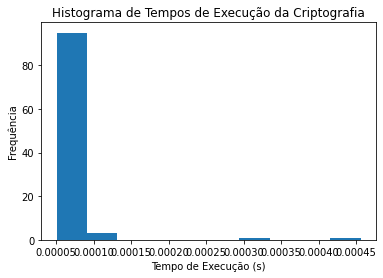

In [47]:
plt.hist(resultados["Tempo de Execução Criptografia (s)"], bins=10) 

plt.title("Histograma de Tempos de Execução da Criptografia") # Define o título do histograma de criptografia

plt.xlabel("Tempo de Execução (s)") # Define o eixo X do histograma de criptografia

plt.ylabel("Frequência") # Define o eixo Y do histograma de criptografia

plt.show() # Exibe o histograma de criptografia

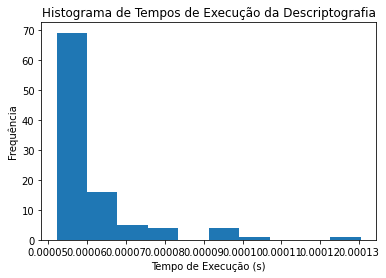

In [48]:
plt.hist(resultados["Tempo de Execução Descriptografia (s)"], bins=10)

plt.title("Histograma de Tempos de Execução da Descriptografia") # Define o título do histograma de descriptografia

plt.xlabel("Tempo de Execução (s)")  # Define o eixo X do histograma de descriptografia

plt.ylabel("Frequência") # Define o eixo Y do histograma de descriptografia

plt.show() # Exibe o histograma de descriptografia

In [49]:
CriptografiaRapido = min(resultados["Tempo de Execução Criptografia (s)"]) # Define o tempo para rápido para criptografia

indiceCriptografiaRapido = resultados["Tempo de Execução Criptografia (s)"].idxmin() # Frase que corresponde ao tempo mais rápido criptografia

DescriptografiaRapido = min(resultados["Tempo de Execução Descriptografia (s)"]) # Define o tempo mais rápido para descriptografia

indiceDescriptografiaRapido = resultados["Tempo de Execução Descriptografia (s)"].idxmin() # Frase que corresponde ao tempo mais rápido descriptografia

# Imprima a mensagem original e a mensagem descriptografada do caso mais rápido de criptografar e descriptografar
print("\nTempo de execução da criptografia mais rápida:", CriptografiaRapido)

print("\nFrase original do caso mais rápido de criptografar:", resultados.loc[indiceCriptografiaRapido, "Mensagem Original"])

print("\nTempo de execução da descriptografia mais rápida:", DescriptografiaRapido)

print("\nFrase descriptografada do caso mais rápido de descriptografar:", resultados.loc[indiceDescriptografiaRapido, "Mensagem Descriptografada"])




Tempo de execução da criptografia mais rápida: 5.054473876953125e-05

Frase original do caso mais rápido de criptografar: Pode parar de nadar agora, Lily. Finalmente chegamos à costa.

Tempo de execução da descriptografia mais rápida: 5.221366882324219e-05

Frase descriptografada do caso mais rápido de descriptografar: Pode parar de nadar agora, Lily. Finalmente chegamos à costa.


# Teste 2

**Segundo Teste :** O código é responsável por realizar a criptografia com mensagem vazia, com a chave AES-256.

In [50]:
key = Fernet.generate_key() # Chave aleatória para o AES-256

fernet = Fernet(key) # Objeto Fernet com a chave gerada

mensagem = "" # Mensagem vazia a ser criptografada

execucoesTeste = 100 # Número de execuções que a criptografia será realizada

execucaoTempo = [] # Lista para armazenar o tempo de execução

criptografiaMensagens = [] # Lista para armazenar as frases criptografadas

for i in range(execucoesTeste):

    inicio = time.time()  # Registra o tempo de execução (Começo)

    mensagemCriptografada = fernet.encrypt(mensagem.encode()) # Criptografa a mensagem usando a chave AES-256 

    fim = time.time()  # Registra o tempo de execução (Final)

    tempoTotal = fim - inicio # Calcula o tempo total que levou para criptografar
    
    execucaoTempo.append(tempoTotal) # Adiciona o tempo de cada teste na lista

    criptografiaMensagens.append(mensagemCriptografada) # Adiciona o valor de cada mensagem na lista


# Crie um DataFrame para armazenar os resultados
resultados = pd.DataFrame({
    "Mensagem Original": [mensagem] * execucoesTeste,
    "Mensagem Criptografada": criptografiaMensagens,
    "Tempo de Execução Criptografia (s)": execucaoTempo # O tempo de execução é dado em segundos
})

In [51]:
if mensagem.encode() == fernet.decrypt(mensagemCriptografada): # Verifica se a mensagem foi criptografada com sucesso
    print("Teste Válido : Mensagem criptografada com sucesso!") # Exibe a mensagem de sucesso se a mensagem for criptografada
else:
    print("Erro ao criptografar a mensagem") # Exibe a mensagem de erro se a mensagem não for criptografada 

Teste Válido : Mensagem criptografada com sucesso!


In [52]:
print(resultados) # Exibe os resultados

   Mensagem Original                             Mensagem Criptografada  \
0                     b'gAAAAABkDHdGm8R-uR5N2VgOEjz3OJ7gDpgxUjpOiRg8...   
1                     b'gAAAAABkDHdG25DH3sGPsy2BJppiGajHdM_l7mW4X9Q7...   
2                     b'gAAAAABkDHdG48qLSITT8pcY_yIZPW-wl1-BV8jITtDc...   
3                     b'gAAAAABkDHdGyjjimbbfOiHDAcEq_uVV2q7x94H-ka-S...   
4                     b'gAAAAABkDHdGDnCSLuQdTd11Am7qLod7uYmUMU4Qq7zp...   
..               ...                                                ...   
95                    b'gAAAAABkDHdGO5idUeYZblqvVtf1DwoZoD-zAy_iutU9...   
96                    b'gAAAAABkDHdGB702E9DPFZKeB-Os3wviGtzTIcZhd4fE...   
97                    b'gAAAAABkDHdG6OcGRslYPuBeI6YP1vxv5vltLTLOUvJe...   
98                    b'gAAAAABkDHdGm2Mu8TqBMfIuzquUwj0cwmKj3wF5jmjj...   
99                    b'gAAAAABkDHdGrUPoQ1IEB3bguJf1Oi_2hCvIm8bLGKUV...   

    Tempo de Execução Criptografia (s)  
0                             0.000324  
1                

In [53]:
media = resultados["Tempo de Execução Criptografia (s)"].mean() # Cálcula o tempo médio para criptografia

desvio_padrao = resultados["Tempo de Execução Criptografia (s)"].std() # Cálcula o desvio padrão para criptografia

print("\nTempo médio de execução: {:.4f} s".format(media)) # Exibe o tempo médio para criptografia

print("\nDesvio padrão do tempo de execução: {:.4f} s".format(desvio_padrao)) # Exibe o desvio padrão para criptografia


Tempo médio de execução: 0.0001 s

Desvio padrão do tempo de execução: 0.0000 s


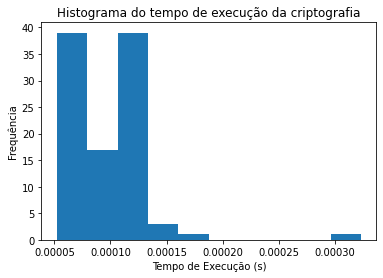

In [54]:
plt.hist(resultados["Tempo de Execução Criptografia (s)"], bins=10)

plt.title("Histograma do tempo de execução da criptografia") # Define o titulo do histograma

plt.xlabel("Tempo de Execução (s)") # Define o eixo X do histograma

plt.ylabel("Frequência")  # Define o eixo Y do histograma

plt.show() # Exibe o histograma

# Teste 3

**Terceiro Teste :** O código é responsável por realizar a criptografia com chave inválida e retornar um erro apropriado.


```
ValueError: Fernet key must be 32 url-safe base64-encoded bytes
```

O erro ocorre pois quando mandamos a chave definida na linha 1 para a crição em Fernet o padrão esperado é inválido. Isso porque, defini-se para 16 bytes, sendo que para usar o Fernet, a chave precisa ser uma sequência de 32 bytes codificada em base64. Quando tentamos inserir uma chave menor que a esperada o algoritmo gerou um erro informando que a chave precisa ter 32 bytes, que é o tamanho correto para a chave AES-256. 

In [55]:
chaveCurta = b'x'*16  # Define uma chave de 16 bytes (AES-128)

fernet = Fernet(chaveCurta) # Objeto Fernet com a chave gerada

palavra = "INTELI" # Definição da palavra para criptografia

palavraBytes = palavra.encode() # Converte a palavra em sequência de bytes 

for i in range(100):

  mensagemCurtaCriptografada = fernet.encrypt(palavraBytes) # Criptografa a palavra


print(mensagemCurtaCriptografada) # Exibe os resultados

ValueError: ignored